In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Assuming Social_Network_Ads.csv is available in the same directory
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

# Selecting relevant features (Age and EstimatedSalary)
X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']

# Split the dataset (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", acc_lr)

Logistic Regression Results:
[[65  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

Accuracy: 0.89


In [8]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
print("K-NN Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", acc_knn)

K-NN Results:
[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

Accuracy: 0.93


=== Model Comparison ===
K-Nearest Neighbors performs better with accuracy 0.9300


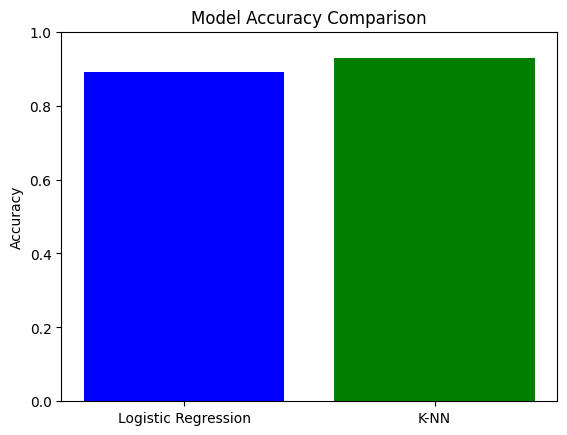

In [7]:
print("=== Model Comparison ===")
if acc_lr > acc_knn:
    print(f"Logistic Regression performs better with accuracy {acc_lr:.4f}")
elif acc_knn > acc_lr:
    print(f"K-Nearest Neighbors performs better with accuracy {acc_knn:.4f}")
else:
    print(f"Both models have the same accuracy: {acc_lr:.4f}")

# Optional: plot comparison
models = ['Logistic Regression', 'K-NN']
accuracies = [acc_lr, acc_knn]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()